In [211]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV




## Import train set

In [212]:
data = pd.read_csv("train.csv")
test_data = pd.read_csv("test.csv")
gender = pd.read_csv("gender_submission.csv")
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [213]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


## EDA

In [214]:
# check for missing values
data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

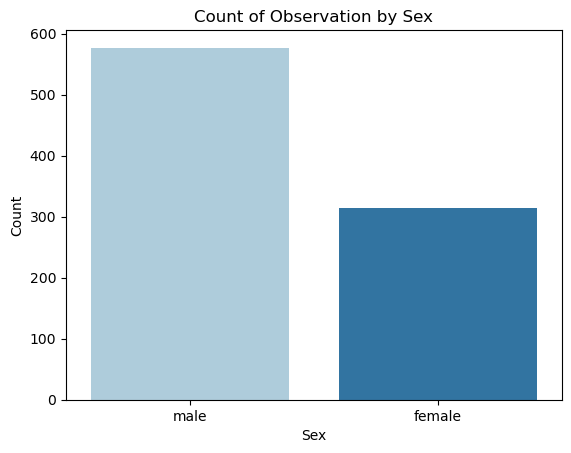

In [215]:
#Set qualitative color palette
colors = sns.color_palette("Paired")

# Plot Count of Sex
sns.countplot(data=data, x="Sex", palette=colors)
plt.title("Count of Observation by Sex")
plt.ylabel("Count")
plt.show()
plt.close()

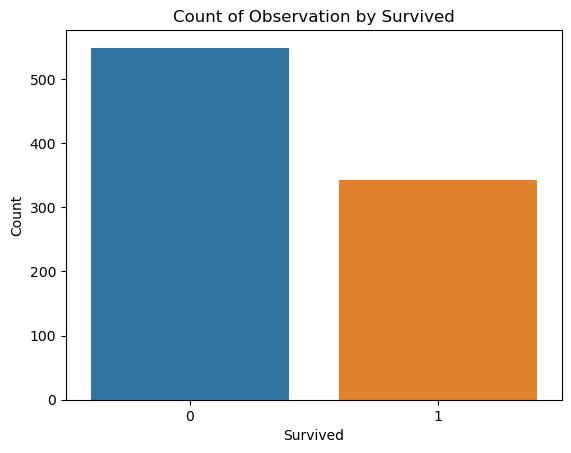

In [216]:
sns.countplot(data=data, x="Survived")
plt.title("Count of Observation by Survived")
plt.ylabel("Count")
plt.show()

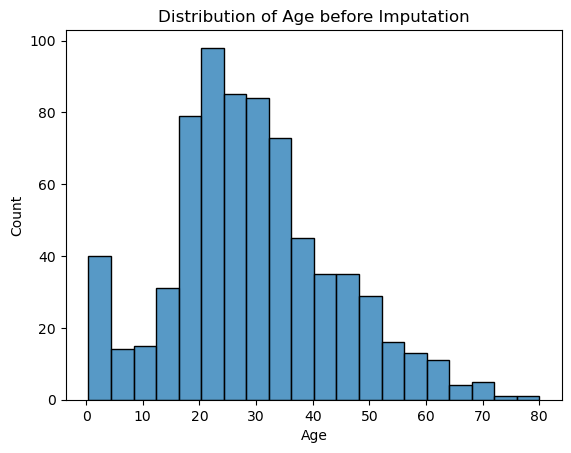

In [217]:
sns.histplot(data=data, x="Age")
plt.title("Distribution of Age before Imputation")
plt.show()

## Impuation

Now we want to impute the missing age values with `IterativeImputer`. It comes with several estimator. The choice of the estimator depends on our data and the characteristics of the age variable.

- 'bayesian_ridge': Bayesian ridge regression model
- 'decision_tree': Single decision tree regressor
- 'extra_trees': Ensemble of randomized extra-trees regressors
- 'knn': K-nearest neighbors regressor
- 'linear': Linear regression model
- 'mlp': Multi-layer perceptron neural network regressor
- 'random_forest': Ensemble of randomized decision trees (Random Forest) regressor
- 'ridge': Ridge regression model
- 'svr': Support vector regression model

In [218]:
features = data.drop(columns=["Name", "Ticket", "PassengerId", "Survived", "Cabin", "Embarked"], axis=1)


test_features = test_data.drop(columns=["Name", "Ticket", "PassengerId", "Cabin", "Embarked"], axis=1)

label = data.Survived

In [219]:
features.Sex = features.Sex.map({"male":1, "female": 0})
test_features.Sex = test_features.Sex.map({"male":1, "female": 0})
features.head()

,Pclass,Sex,Age,SibSp,Parch,Fare
0,3,1,22.0,1,0,7.2500
1,1,0,38.0,1,0,71.2833
2,3,0,26.0,0,0,7.9250
3,1,0,35.0,1,0,53.1000
4,3,1,35.0,0,0,8.0500


In [220]:
imp_iter = IterativeImputer(max_iter=10, random_state=42)
features_imp = imp_iter.fit_transform(features)

features_imp = pd.DataFrame(features_imp, columns=features.columns)


In [221]:
features_imp.isna().sum()

Pclass    0
Sex       0
Age       0
SibSp     0
Parch     0
Fare      0
dtype: int64

In [222]:
test_features.isna().sum()

Pclass     0
Sex        0
Age       86
SibSp      0
Parch      0
Fare       1
dtype: int64

Text(0.5, 1.0, 'Distribution of Age after Iter-Imputation')

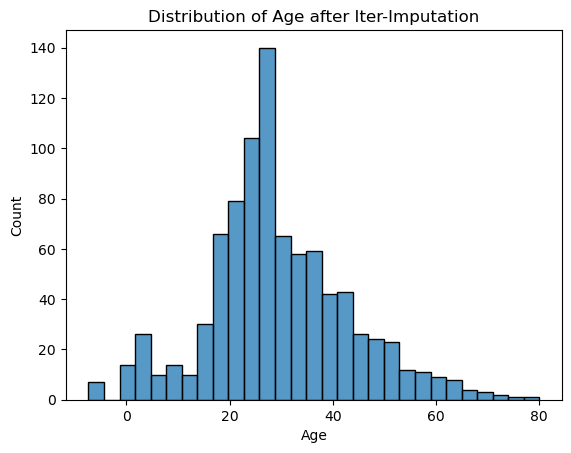

In [223]:
sns.histplot(data=features_imp, x="Age")
plt.title("Distribution of Age after Iter-Imputation")

In [224]:
np.min(features_imp.Age)

-7.348648995424227

We got negative values for age which just is impossible. So we use another Imputation Strategy like `KNNImputer`

In [225]:
knn_imp = KNNImputer(n_neighbors=3)

features_knn = knn_imp.fit_transform(features)
features_knn = pd.DataFrame(features_knn, columns=features.columns)

test_features_knn = knn_imp.fit_transform(test_features)
test_features_knn = pd.DataFrame(test_features_knn, columns=test_features.columns)

features_knn.head()


,Pclass,Sex,Age,SibSp,Parch,Fare
0,3.0,1.0,22.0,1.0,0.0,7.2500
1,1.0,0.0,38.0,1.0,0.0,71.2833
2,3.0,0.0,26.0,0.0,0.0,7.9250
3,1.0,0.0,35.0,1.0,0.0,53.1000
4,3.0,1.0,35.0,0.0,0.0,8.0500


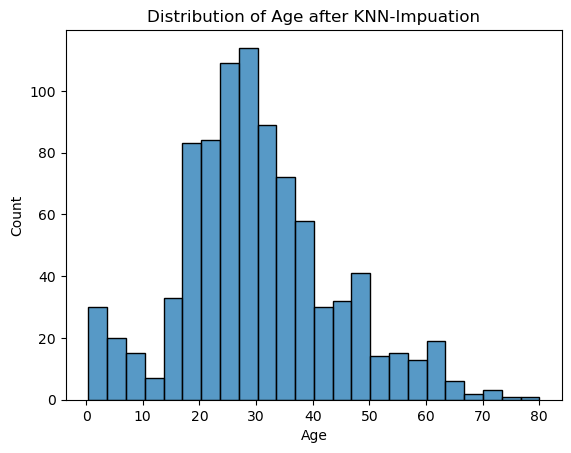

In [226]:
sns.histplot(features_knn, x="Age")
plt.title("Distribution of Age after KNN-Impuation")
plt.show()

In [227]:
np.min(features_knn.Age)

0.42

In [228]:
corr_matrix = features_knn.corr()

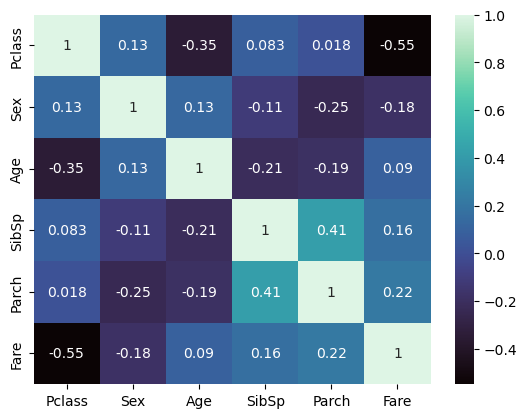

In [229]:
sns.heatmap(corr_matrix, annot=True, cmap="mako")
plt.show()

Apart from the variables Fare and Pclass, the variables do not seem to correlate with each other. So we could decide for a regression or classification.

## Standardize Data

In [230]:
scaler = StandardScaler()
features_knn_scaled = scaler.fit_transform(features_knn)

## LogisticRegression()

In [231]:
lr = LogisticRegression()
lr.fit(features_knn_scaled, label)
print(lr.score(features_knn_scaled, label))

0.8047138047138047


In [232]:
## LinearRegression()

In [233]:
linear = LinearRegression()
linear.fit(features_knn_scaled, label)
print(linear.score(features_knn_scaled, label))

print("Intercept:", linear.intercept_)
print("Coefficients:", linear.coef_)


0.39449371142783574
Intercept: 0.3838383838383838
Coefficients: [-0.14465575 -0.24128774 -0.07628901 -0.04510652 -0.01674363  0.01932122]


In [234]:
## Lasso

In [235]:
lasso = Lasso()
lasso.fit(features_knn_scaled, label)
print(lasso.score(features_knn_scaled, label))

0.0


## Ridge

In [236]:
ridge = Ridge()
ridge.fit(features_knn_scaled, label)
print(ridge.score(features_knn_scaled, label))

0.3944931883140018


In [237]:
## RandomForest

In [238]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(features_knn, label)

print(rf.score(features_knn, label))

0.9820426487093153


In [239]:
print('Random Forest base parameters', rf.get_params())

Random Forest base parameters {'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': 42, 'verbose': 0, 'warm_start': False}


## GradientBoostingClassifier

In [ ]:
grad_classifier = GradientBoostingClassifier()

learning_rate_list = [0.001, 0.01, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.5]

param_grid = {'learning_rate': learning_rate_list,
              'n_estimators': [100, 500, 1000],
              'max_depth': [3, 5, 7],
              'min_samples_split': [2, 5, 10],
              'subsample': [0.5, 0.8, 1.0]}

gs = GridSearchCV(grad_classifier, param_grid=param_grid, cv=5, scoring="accuracy", verbose=True)

gs.fit(features_knn, label)

best_learning_rate = gs.best_params_["learning_rate"]
print(best_learning_rate)

print(gs.score(features_knn, label))

predictions = gs.predict(test_features_knn)




Fitting 5 folds for each of 729 candidates, totalling 3645 fits


In [243]:
output = pd.DataFrame({'PassengerId': test_data.PassengerId, 'Survived': predictions})
output.to_csv('submission.csv', index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!
